In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/store-sales-time-series-forecasting/oil.csv
/kaggle/input/store-sales-time-series-forecasting/sample_submission.csv
/kaggle/input/store-sales-time-series-forecasting/holidays_events.csv
/kaggle/input/store-sales-time-series-forecasting/stores.csv
/kaggle/input/store-sales-time-series-forecasting/train.csv
/kaggle/input/store-sales-time-series-forecasting/test.csv
/kaggle/input/store-sales-time-series-forecasting/transactions.csv


In [19]:
path = "/kaggle/input/store-sales-time-series-forecasting/"
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
train_df = pd.read_csv(path+"train.csv")
train_df["date"] = pd.to_datetime(train_df['date'])
train_df

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.000,0
1,1,2013-01-01,1,BABY CARE,0.000,0
2,2,2013-01-01,1,BEAUTY,0.000,0
3,3,2013-01-01,1,BEVERAGES,0.000,0
4,4,2013-01-01,1,BOOKS,0.000,0
...,...,...,...,...,...,...
3000883,3000883,2017-08-15,9,POULTRY,438.133,0
3000884,3000884,2017-08-15,9,PREPARED FOODS,154.553,1
3000885,3000885,2017-08-15,9,PRODUCE,2419.729,148
3000886,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8


In [7]:
train_df['store_nbr'].unique()

array([ 1, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,  2, 20, 21, 22, 23, 24,
       25, 26, 27, 28, 29,  3, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39,  4,
       40, 41, 42, 43, 44, 45, 46, 47, 48, 49,  5, 50, 51, 52, 53, 54,  6,
        7,  8,  9])

In [8]:
train_df['family'].unique()

array(['AUTOMOTIVE', 'BABY CARE', 'BEAUTY', 'BEVERAGES', 'BOOKS',
       'BREAD/BAKERY', 'CELEBRATION', 'CLEANING', 'DAIRY', 'DELI', 'EGGS',
       'FROZEN FOODS', 'GROCERY I', 'GROCERY II', 'HARDWARE',
       'HOME AND KITCHEN I', 'HOME AND KITCHEN II', 'HOME APPLIANCES',
       'HOME CARE', 'LADIESWEAR', 'LAWN AND GARDEN', 'LINGERIE',
       'LIQUOR,WINE,BEER', 'MAGAZINES', 'MEATS', 'PERSONAL CARE',
       'PET SUPPLIES', 'PLAYERS AND ELECTRONICS', 'POULTRY',
       'PREPARED FOODS', 'PRODUCE', 'SCHOOL AND OFFICE SUPPLIES',
       'SEAFOOD'], dtype=object)

In [9]:
print(train_df['date'].min(), train_df['date'].max())

2013-01-01 00:00:00 2017-08-15 00:00:00


In [10]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 6 columns):
 #   Column       Dtype         
---  ------       -----         
 0   id           int64         
 1   date         datetime64[ns]
 2   store_nbr    int64         
 3   family       object        
 4   sales        float64       
 5   onpromotion  int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(1)
memory usage: 137.4+ MB


In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

train_df_transformed = pd.get_dummies(train_df, columns=['family'])
train_df_transformed['DOW'] = train_df_transformed['date'].dt.dayofweek
train_df_transformed['Month'] = train_df_transformed['date'].dt.month
train_df_transformed['Year'] = train_df_transformed['date'].dt.year
X = train_df_transformed.drop(['sales', 'id', 'date'],axis=1)
y = train_df_transformed['sales']


In [17]:
y

0             0.000
1             0.000
2             0.000
3             0.000
4             0.000
             ...   
3000883     438.133
3000884     154.553
3000885    2419.729
3000886     121.000
3000887      16.000
Name: sales, Length: 3000888, dtype: float64

In [16]:
y.describe()

count    3.000888e+06
mean     3.577757e+02
std      1.101998e+03
min      0.000000e+00
25%      0.000000e+00
50%      1.100000e+01
75%      1.958473e+02
max      1.247170e+05
Name: sales, dtype: float64

In [20]:
np.log1p(y)

0          0.000000
1          0.000000
2          0.000000
3          0.000000
4          0.000000
             ...   
3000883    6.084802
3000884    5.046987
3000885    7.791824
3000886    4.804021
3000887    2.833213
Name: sales, Length: 3000888, dtype: float64

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='sales', ylabel='Count'>

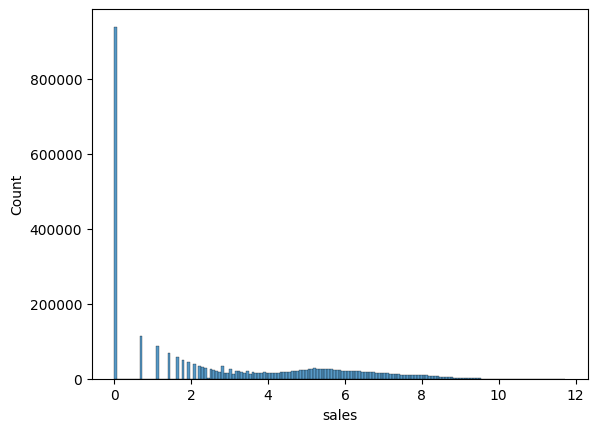

In [21]:
sns.histplot(np.log1p(y))


array([ 2.81060646e+00,  1.78881135e+01, -3.06056732e+02, -3.11116997e+02,
       -3.10153631e+02,  1.89616742e+03, -3.11146303e+02,  8.69509566e+01,
       -3.04169119e+02,  6.31142775e+02,  2.54593091e+02, -1.60826719e+02,
       -1.78139890e+02, -1.81163738e+02,  3.08909254e+03, -2.91078287e+02,
       -3.10111330e+02, -2.99976636e+02, -3.00949555e+02, -3.10771033e+02,
       -1.73816385e+02, -3.04386945e+02, -3.07386361e+02, -3.04588713e+02,
       -2.35215680e+02, -3.08346441e+02, -2.91727932e+01, -8.93580458e+01,
       -3.07935147e+02, -3.05398879e+02, -5.22431422e+00, -2.21828282e+02,
        8.18227642e+02, -3.11120596e+02, -2.96735868e+02,  2.06773263e+01,
        6.92257157e+00,  3.65880412e+01])

In [22]:
model = LinearRegression()
model.fit(X,np.log1p(y))

LinearRegression()

In [23]:
test_df = pd.read_csv(path+"test.csv")
test_df["date"] = pd.to_datetime(test_df['date'])
test_df_transformed = pd.get_dummies(test_df, columns=['family'])
test_df_transformed['DOW'] = test_df_transformed['date'].dt.dayofweek
test_df_transformed['Month'] = test_df_transformed['date'].dt.month
test_df_transformed['Year'] = test_df_transformed['date'].dt.year
ids = test_df_transformed.id
X_test = test_df_transformed.drop(['id', 'date'], axis=1)

In [24]:
y_pred = model.predict(X_test)
submission_df = pd.DataFrame({'id': ids, 'sales': y_pred})
submission_df.loc[submission_df['sales']<0, 'sales'] = 0
submission_df['sales'] = np.expm1(submission_df['sales'])
submission_df.to_csv('submission.csv', index=False)